In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

def get_sync_time():
    if torch.cuda.is_available():
        torch.cuda.synchronize()
    return time.perf_counter()

def see_plot(pict, color='gray', size=(4,4), title=''):
    plt.figure(figsize=size)
    plt.imshow(pict, cmap=color)
    plt.title(title)
    plt.grid()
    #plt.axis('off')
    plt.show()
    
def plot_samples_on_epoch(samples, nrow=4, chanels=3, size=(8,8), title='None'):
    grid_img = torchvision.utils.make_grid(samples, nrow=nrow)
    if chanels==1:
        see_plot(grid_img.permute(1, 2, 0)*255, size=size, title=title)
    else:
        see_plot(grid_img.permute(1, 2, 0), size=size, title=title)
#==========================================================================

from psutil import virtual_memory
ram_bit = virtual_memory().total
ram_gb = ram_bit / (2**10) / (2**10) / (2**10)  # Bit --> B --> Mb --> Gb
print('Runtime has {:.1f} gigabytes of available RAM'.format(ram_gb))

gpu_info = !nvidia-smi
driver = str(gpu_info).split('Driver Version:')[1].split()[0]
cuda = str(gpu_info).split('CUDA Version:')[1].split()[0]    
print('Driver Version: {}'.format(driver))  
print('CUDA Version: {}'.format(cuda))  
print('Torch Version: {}'.format(torch.__version__))

Runtime has 62.7 gigabytes of available RAM
Driver Version: 470.103.01
CUDA Version: 11.4
Torch Version: 1.8.1+cu102


In [2]:
def border1(p):
    p_dilate = cv2.dilate(p, np.ones((3, 3), np.uint8), iterations=1)
    border = (p != p_dilate).astype(np.uint8) 
    return border
#--------------------------------------------------------------------------

def border2(p):
    averaged_mask = F.avg_pool2d(p.float(), (11, 11),
                                     stride=(1, 1),
                                     padding=(5, 5))
    border = ((averaged_mask > 0.01) * (averaged_mask < 0.99)).long()
    return border
#--------------------------------------------------------------------------

from scipy.ndimage import distance_transform_edt as distance
def border3(p):
    res = np.zeros_like(p)
    posmask = p.astype(np.bool)
    if posmask.any():
        negmask = ~posmask
        res = distance(negmask) * negmask - (distance(posmask) - 1) * posmask
    return res

p: [0 1] (256, 256)


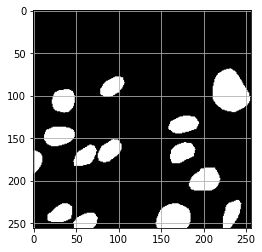

b1: [0 1] (256, 256)


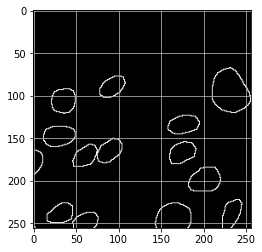

b2: [0 1] (256, 256)


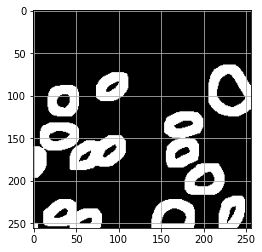

b3: [-18.72308292 -18.41648784 -18.23538406 ...  98.08159868  98.37174391
  98.67117107] (256, 256)


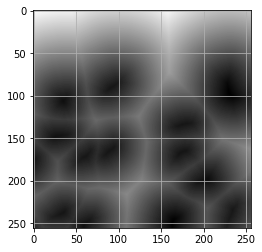

In [3]:
path = './F1_1_5_1.ts_f_400_mask3.png'
p = cv2.imread(path, cv2.IMREAD_GRAYSCALE)//255
print('p:', np.unique(p), p.shape) # p = 1-chanel numpy array with {0,1} elements; type=np.uint8 !
see_plot(p)

b1 = border1(p)
b2 = border2(torch.tensor(p).view(1,256,256)).view(256,256).numpy()
b3 = border3(p)

print('b1:', np.unique(b1), b1.shape)
see_plot(b1)
print('b2:', np.unique(b2), b2.shape)
see_plot(b2)
print('b3:', np.unique(b3), b3.shape)
see_plot(b3)

p: [0 1] (256, 256)


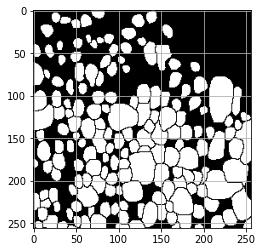

b1: [0 1] (256, 256)


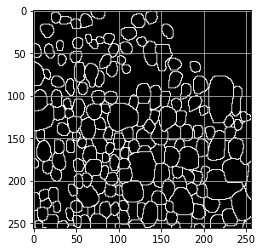

b2: [0 1] (256, 256)


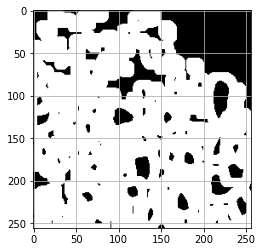

b3: [-13.56021978 -13.2126704  -13.         ...  82.87339742  83.21658489
  83.57032966] (256, 256)


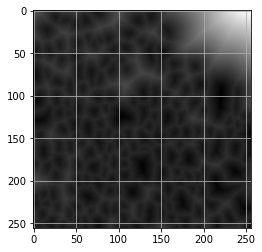

In [4]:
path = './F2_2_3_1.ts_f_0_mask3.png'
p = cv2.imread(path, cv2.IMREAD_GRAYSCALE)//255
print('p:', np.unique(p), p.shape) # p = 1-chanel numpy array with {0,1} elements; type=np.uint8 !
see_plot(p)

b1 = border1(p)
b2 = border2(torch.tensor(p).view(1,256,256)).view(256,256).numpy()
b3 = border3(p)

print('b1:', np.unique(b1), b1.shape)
see_plot(b1)
print('b2:', np.unique(b2), b2.shape)
see_plot(b2)
print('b3:', np.unique(b3), b3.shape)
see_plot(b3)